# Import

## Module import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset import

In [2]:
imported_df = pd.read_csv('online_shoppers_intention.csv')
df = imported_df

# Preprocessing

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Dtypes

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Month and VisitorType aren't correctly typed

### Month not type correction

In [5]:
df.Month.value_counts(dropna=False)

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Month is in reality a categorical string variable.

In [6]:
df['Month'] = df.Month.astype('category')

### VisitorType

In [7]:
df.VisitorType.value_counts(dropna=False)

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
df['VisitorType'] = df.VisitorType.astype('category')

VisitorType is in reality a categorical string variable.

In [9]:
df.SpecialDay.value_counts(dropna=False)

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

### Categorical variables

Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend and Revenue are categorical variables.

In [10]:
df.dtypes[10:]

Month               category
OperatingSystems       int64
Browser                int64
Region                 int64
TrafficType            int64
VisitorType         category
Weekend                 bool
Revenue                 bool
dtype: object

I change dtype of categorical columns taged as int64 beacause int64 type can introduct a bias in the model (int64 have order, categorical not all time ). So OperatingSystems, Browser, Region and TrafficType variable dtype will be change as category.

At other hand boolean is a better type than category type for variables that take only 2 distinct values. So Weekend variable will stay of type bool.

In [11]:
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('category')

In [12]:
df.dtypes[10:]

Month               category
OperatingSystems    category
Browser             category
Region              category
TrafficType         category
VisitorType         category
Weekend                 bool
Revenue                 bool
dtype: object

## NA preprocessing 

In [13]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no NA values

# Pipeline

In [14]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, f1_score

from matplotlib.colors import ListedColormap

In [15]:
X = df.copy().drop(['Revenue'], axis=1)
y = df.Revenue.copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [17]:
#numerical_features = make_column_selector(dtype_include=np.number)
numerical_features = X.select_dtypes(include=['float']).columns
#categorical_features = make_column_selector(dtype_exclude=np.number)
categorical_features =  X.select_dtypes(include=['category']).columns
boolean_features =  X.select_dtypes(include=['bool']).columns

In [18]:
numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = Pipeline(steps=[( 'onehot',OneHotEncoder(handle_unknown = 'ignore'))])
boolean_pipeline = make_pipeline(FunctionTransformer(lambda x: x))

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
                    ('num', numerical_pipeline, numerical_features),
                    ('cat', categorical_pipeline, categorical_features),
                    ('bool', boolean_pipeline, boolean_features)
    ])

# SVC Model

In [20]:
SVG_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('linearRegression', SVC())
    ])

In [21]:
fitted_SVG_model = SVG_model.fit(X_train, y_train)

In [22]:
y_prediction = fitted_SVG_model.predict(X_test)

## Model evaluation

In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_prediction)

### Accuracy

In [24]:
accuracy_score(y_test, y_prediction)

0.8978102189781022

+90% of accuracy is good. But it's quite easy with a unbalanced dataset like we have.

So we will use an other metric to evaluate the model prediction.


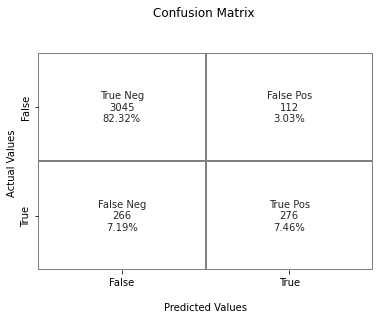

In [25]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=ListedColormap(['white']), cbar=False, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

*Explenation about why the accuracy isn't a good metric here:*

In this dataset only 15% of the data correspond to possitive class (people who buy).
So a basic model that respond always false will have 85% accuracy.

**So let's see our result with corrected metric.**

In [26]:
N = [len(y_test[y_test==False]), len(y_test[y_test==False]), len(y_test[y_test==True]), len(y_test[y_test==True])]

In [27]:
values = [a/b for a,b in zip(cf_matrix.flatten(),N)]

In [28]:
data = [[values[0], values[1]],[values[2], values[3]]]

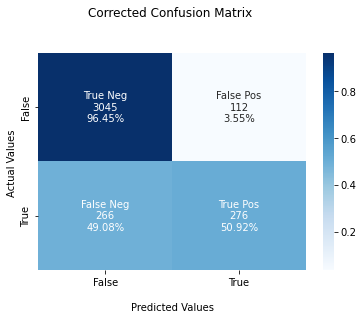

In [29]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
values]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(data, annot=labels, fmt='', cmap='Blues')
ax.set_title('Corrected Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

The results of this first SVG model iare:

**50,9%** of buyers are correctly tagged.<br>
**96,45%** of none-buyers are correctly tagged.<br>
**Less than 4%** of none-buyers are tagged as buyer.

**We need** to reduce our model False Neg

In [30]:
f1_score(y_test, y_prediction)

0.5935483870967743

In [31]:
recall_score(y_test, y_prediction)

0.5092250922509225

**Our model have a f1 score of 59% and a recall of 50,9%**. (f1 score correspond to corected accuracy for unballanced dataset)